In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [37]:
data = pd.read_csv('bank_cleaned.csv')
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [38]:
data.shape

(40841, 18)

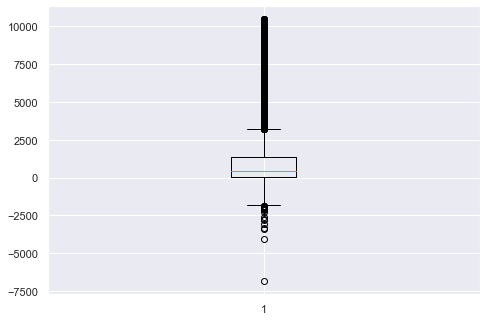

In [39]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
ax.boxplot(data['balance'])
plt.show()

In [40]:
category_features = data.select_dtypes(include=['object', 'bool']).columns.values
print(category_features)
for col in category_features:
    print("Unique values in each column",col, "(", len(data[col].unique()) , "values):\n", np.sort(data[col].unique()))

['job' 'marital' 'education' 'default' 'housing' 'loan' 'month' 'poutcome'
 'response']
Unique values in each column job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'other'
 'retired' 'self-employed' 'services' 'student' 'technician' 'unemployed']
Unique values in each column marital ( 3 values):
 ['divorced' 'married' 'single']
Unique values in each column education ( 3 values):
 ['primary' 'secondary' 'tertiary']
Unique values in each column default ( 2 values):
 ['no' 'yes']
Unique values in each column housing ( 2 values):
 ['no' 'yes']
Unique values in each column loan ( 2 values):
 ['no' 'yes']
Unique values in each column month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Unique values in each column poutcome ( 3 values):
 ['failure' 'success' 'unknown']
Unique values in each column response ( 2 values):
 ['no' 'yes']


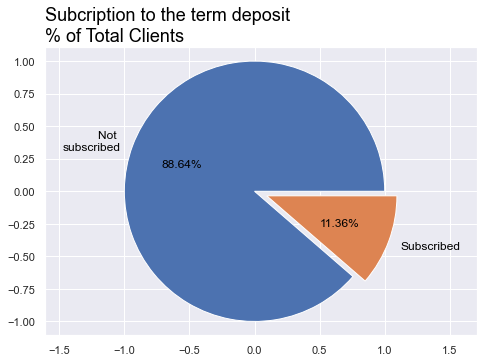

In [41]:
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(data['response'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

Text(0, 0.5, 'Frequency of Purchase')

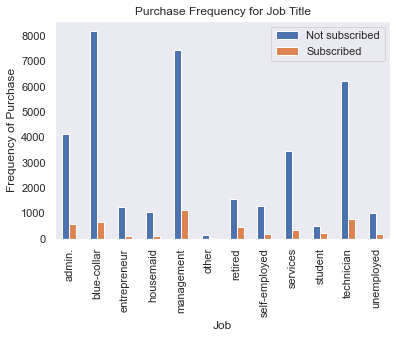

In [42]:
table = pd.crosstab(data.job, data.response)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid()

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [43]:
category_col = ['job','marital','education','default','housing','loan','month','poutcome',
 'response']
for col in category_col:
    data[col] =data[col].astype('category')
    data[col] = data[col].cat.codes

X = data.drop(columns=['response','response_binary'])
y = data['response']
['job' 'marital' 'education' 'default' 'housing' 'loan' 'month' 'poutcome'
 'response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (32672, 16)
Number transactions y_train dataset:  (32672,)
Number transactions X_test dataset:  (8169, 16)
Number transactions y_test dataset:  (8169,)


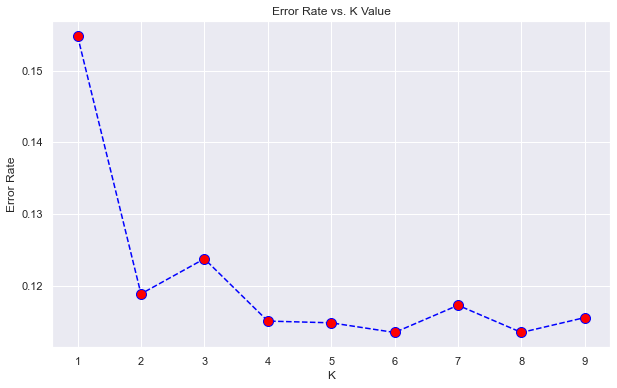

Minimum error:- 0.11347778185824453 at K = 6


In [47]:
from sklearn.metrics import accuracy_score
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [48]:
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [49]:
y_pred = knn.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.8865222181417555